Zadatak 1: Odnos budzeta i popularnosti filma

In [582]:
import pandas as pd
import matplotlib.pyplot as plt

filmovi_data=pd.read_csv(r'C:\Users\nikap\Desktop\Data\Data\Filmovi\movie_dataset.csv')

In [583]:
filmovi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [584]:
filmovi_data.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [585]:
filmovi_data.corr(numeric_only=True)

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
index,1.000000,-0.761579,0.190771,-0.414342,-0.522110,-0.319370,-0.120157,-0.442207
budget,-0.761579,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,0.190771,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,-0.414342,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,-0.522110,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,-0.319370,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,-0.120157,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,-0.442207,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


Budzet i popularnost su umjereno pozitivno korelirani, odnosno vidljivo je da visi budzet asociran s vecom popurlanosti, ali iz koeficijenta korelacije za ocekivati bi bilo da i ostali faktori pridonose popularnosti.
Popularnost pokazuje vecu lineranu korelaciju s brojem glasova i prihodom. 

Zadatak 2: Trziste racunala i telefona

In [586]:
# Ucitavanje podataka
pc_data=pd.read_csv(r'C:\Users\nikap\Desktop\Data\Data\Trziste racunala i pametnih telefona\personal_computers_total.csv')
cell_phones_data=pd.read_csv(r'C:\Users\nikap\Desktop\Data\Data\Trziste racunala i pametnih telefona\cell_phones_total.csv')
countries_data=pd.read_csv(r'C:\Users\nikap\Desktop\Data\Data\Trziste racunala i pametnih telefona\facts_countries.csv', delimiter=";")

In [587]:
''' 
prvi redak je nepotreban i njega cemo obrisat
podaci nisu po godinama pa pretpostavljam da cijela tablica predstavlja podatke drzava u zadnjih 5 godina ''' 
countries_data=countries_data.drop(0).reset_index(drop=True)
countries_data.head(2)

,Country,Area(sq km),Birth rate(births/1000 population),Current account balance,Death rate(deaths/1000 population),Debt - external,Electricity - consumption(kWh),Electricity - production(kWh),Exports,GDP,...,Oil - production(bbl/day),Oil - proved reserves(bbl),Population,Public debt(% of GDP),Railways(km),Reserves of foreign exchange & gold,Telephones - main lines in use,Telephones - mobile cellular,Total fertility rate(children born/woman),Unemployment rate(%)
0,Afghanistan,647500,47.02,NaN,20.75,8000000000,652200000,540000000,446000000,21500000000,...,0,0,29928987,NaN,NaN,NaN,33100,15000,6.75,NaN
1,Akrotiri,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [588]:
# provjera tipa objekta koji nam treba
countries_data["Public debt(% of GDP)"].dtype

dtype('O')

Podaci u Public debt(% of GDP) nisu numericki nego su strigovi. Kako mi zelimo drzave s niskim Public debt(% of GDP), sto je vrlo nategnuta pretpostavka da ako je medu nizima od svih, onda je padao, moramo moci podatke sortirati po numerickim vrijednostima, pa prvo konverzija. Obrnuto za drzave s najvecim Public debt(% of GDP) pretpostavit cemo da je rastao

In [589]:
countries_data["Public debt(% of GDP)"]=countries_data["Public debt(% of GDP)"].astype("Float32")
countries_data["Public debt(% of GDP)"].dtype

Float32Dtype()

One drzave za koje nemamo podatke nam ne trebaju pa cemo te retke izbaciti

In [590]:
countries_data=countries_data[~countries_data["Public debt(% of GDP)"].isna()]
countries_data.head(2)

,Country,Area(sq km),Birth rate(births/1000 population),Current account balance,Death rate(deaths/1000 population),Debt - external,Electricity - consumption(kWh),Electricity - production(kWh),Exports,GDP,...,Oil - production(bbl/day),Oil - proved reserves(bbl),Population,Public debt(% of GDP),Railways(km),Reserves of foreign exchange & gold,Telephones - main lines in use,Telephones - mobile cellular,Total fertility rate(children born/woman),Unemployment rate(%)
3,Algeria,2381740,17.13,11900000000,4.60,21900000000,23610000000,25760000000,32160000000,212300000000,...,1200000,11870000000,32531853,37.400002,3973,43550000000,2199600,1447310,1.92,25.40
10,Argentina,2766890,16.90,5473000000,7.56,157700000000,81650000000,81390000000,33780000000,483500000000,...,755000,2900000000,39537943,118.0,34091,19470000000,8009400,6500000,2.19,14.80


Sortiranje po dugu ascending

In [591]:
# 3 drzave kandidata za usporedbu kretanja cijena PC-a i telefona s najmanjim Public debt(% of GDP) 
countries_data=countries_data.sort_values(by=["Public debt(% of GDP)"])
countries_data[["Country","Public debt(% of GDP)" ]].head(3)

,Country,Public debt(% of GDP)
109,Hong Kong,2.1
233,Tanzania,5.0
75,Estonia,5.4


In [592]:
# 3 drzave kandidata za usporedbu kretanja cijena PC-a i telefona s najvisim Public debt(% of GDP)
countries_data=countries_data.sort_values(by=["Public debt(% of GDP)"])
countries_data[["Country","Public debt(% of GDP)" ]].tail(3)

,Country,Public debt(% of GDP)
122,Japan,164.300003
138,Lebanon,177.899994
148,Malawi,228.300003


In [593]:
# transformacija podataka za nezaposlenost
# ostavljamo samo podatke koji imamo popunjene
countries_data_unemployment=countries_data[["Country", "Unemployment rate(%)"]]
countries_data_unemployment=countries_data_unemployment[~countries_data_unemployment["Unemployment rate(%)"].isna()]
countries_data_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 109 to 138
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               102 non-null    object
 1   Unemployment rate(%)  102 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [594]:
# i ovdje nam je podatak o postotku nezaposlenih string umjesto numericki podatak, morat cemo ga zamijeniti
countries_data_unemployment["Unemployment rate(%)"]=countries_data_unemployment["Unemployment rate(%)"].astype("Float32")
countries_data_unemployment

,Country,Unemployment rate(%)
109,Hong Kong,6.7
75,Estonia,9.6
31,Botswana,23.799999
141,Libya,30.0
183,Oman,15.0
...,...,...
10,Argentina,14.8
261,Zambia,50.0
120,Jamaica,15.0
122,Japan,4.7


In [595]:
# sada mozemo sortirati
countries_data_unemployment=countries_data_unemployment.sort_values(by=["Unemployment rate(%)"])


In [596]:
countries_data_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 251 to 262
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               102 non-null    object 
 1   Unemployment rate(%)  102 non-null    Float32
dtypes: Float32(1), object(1)
memory usage: 2.1+ KB


In [597]:
print(countries_data_unemployment.head(3))
print(countries_data_unemployment.tail(3))

        Country  Unemployment rate(%)
251  Uzbekistan                   0.6
16   Azerbaijan                   1.2
234    Thailand                   1.5
      Country  Unemployment rate(%)
210   Senegal                  48.0
261    Zambia                  50.0
262  Zimbabwe                  70.0


Najmanju nezaposlenesnost imaju Uzbekistan, Azerbaijan i Thailand, najvecu Senegal, Zambia i Zimbabwe

In [598]:
pc_data.head(7)


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7930,10k
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85k,100k
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000,10k,12k,15k,17k,27k,NaN,NaN,93.4k,111k
3,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500,1770,2500,NaN
4,Albania,NaN,NaN,NaN,NaN,NaN,NaN,5000,10k,15k,20k,25k,30k,36k,42k,48k,54k,120k
5,United Arab Emirates,NaN,NaN,60k,77.8k,96k,115k,160k,200k,250k,300k,400k,420k,450k,650k,850k,1.05M,1.4M
6,Argentina,235k,290k,330k,460k,1.18M,1.24M,1.47M,1.71M,1.92M,2.1M,2.56M,2.9M,3M,3.1M,3.2M,3.5M,NaN


In [599]:
cell_phones_data.head(7)

,country,1960,1965,1966,1967,1968,1969,1970,1971,1972,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,132k,NaN,135k,139k,140k,141k,NaN,NaN,NaN,NaN
1,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,10.2M,13.8M,15.3M,16.8M,18.4M,19.7M,21.6M,23.9M,22M,22.6M
2,Angola,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,9.4M,12.1M,12.8M,13.3M,14.1M,13.9M,13M,13.3M,13.3M,14.8M
3,Albania,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,2.69M,3.1M,3.5M,3.69M,3.36M,3.4M,3.37M,3.63M,2.71M,2.63M
4,Andorra,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,65.5k,65k,63.9k,63.9k,66.2k,71.3k,76.1k,80.3k,82.6k,87.9k
5,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.9M,11.7M,13.8M,16.1M,16.8M,17.9M,19.9M,19.8M,20.1M,19.6M
6,Argentina,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,57.1M,60.7M,64.3M,67.4M,61.2M,61.8M,63.7M,61.9M,58.6M,58.6M


Obzirom da podatke o prodaji PC-a imam samo do 2006, za daljnje razmatranje relevantni podaci o prodaji PC-a ili cell phone-a ce biti samo od 2001-2005. Zato u nastavku novi dataframe-ovi sa podskupom podataka

In [600]:
pc_data_5_years=pc_data[["country","2001","2002", "2003","2004","2005"]]
pc_data_5_years

,country,2001,2002,2003,2004,2005
0,Aruba,NaN,NaN,NaN,NaN,7930
1,Afghanistan,NaN,NaN,NaN,NaN,85k
2,Angola,17k,27k,NaN,NaN,93.4k
3,Anguilla,NaN,NaN,1500,1770,2500
4,Albania,30k,36k,42k,48k,54k
...,...,...,...,...,...,...
191,Samoa,1100,1200,2000,2800,3500
192,Yemen,37k,145k,200k,300k,400k
193,South Africa,3.1M,3.3M,3.51M,3.74M,3.97M
194,Zambia,75k,80k,95k,113k,131k


In [601]:
cell_phones_data_5_years=cell_phones_data[["country","2001","2002", "2003","2004","2005"]]
cell_phones_data_5_years

,country,2001,2002,2003,2004,2005
0,Aruba,53k,61.8k,70k,98.4k,103k
1,Afghanistan,0,25k,200k,600k,1.2M
2,Angola,75k,140k,350k,740k,1.61M
3,Albania,393k,851k,1.1M,1.26M,1.53M
4,Andorra,29.4k,32.8k,51.9k,58.4k,64.6k
...,...,...,...,...,...,...
209,Samoa,2500,2700,10.5k,16k,24k
210,Yemen,148k,487k,675k,1.48M,2.28M
211,South Africa,10.8M,13.7M,16.9M,20.8M,34M
212,Zambia,121k,139k,241k,464k,950k


In [602]:
print(pc_data_5_years.info())
print(cell_phones_data_5_years.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  196 non-null    object
 1   2001     184 non-null    object
 2   2002     184 non-null    object
 3   2003     183 non-null    object
 4   2004     183 non-null    object
 5   2005     177 non-null    object
dtypes: object(6)
memory usage: 9.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  214 non-null    object
 1   2001     204 non-null    object
 2   2002     206 non-null    object
 3   2003     206 non-null    object
 4   2004     207 non-null    object
 5   2005     204 non-null    object
dtypes: object(6)
memory usage: 10.2+ KB
None


Da bismo olasali analizu, podatke od PC prodaji i prodaji mobilnih uredaja uzet cemo samo za one zemlje koje smo izolirali kod drzava

In [603]:
pc_data_5_years_top5=pc_data_5_years[pc_data_5_years['country'].isin( ['Hong Kong','Tanzania', 'Estonia'] )]
pc_data_5_years_bottom5=pc_data_5_years[pc_data_5_years['country'].isin( ['Japan','Lebanon', 'Malawi'] )]

pc_data_5_years_top5_unemployment=pc_data_5_years[pc_data_5_years['country'].isin( ['Hong Uzbekistan','Azerbaijan', 'Thailand'] )]
pc_data_5_years_bottom5_unemployment=pc_data_5_years[pc_data_5_years['country'].isin( ['Senegal','Zambia', 'Zimbabwe'] )]


In [604]:
print(pc_data_5_years_top5)
print(pc_data_5_years_bottom5)
print(pc_data_5_years_top5_unemployment)
print(pc_data_5_years_bottom5_unemployment)

      country  2001  2002  2003  2004  2005
56    Estonia  250k  285k  595k  620k  650k
180  Tanzania  120k  144k  200k  278k  356k
     country   2001   2002   2003   2004   2005
92     Japan  45.6M  48.7M    52M    NaN    NaN
101  Lebanon   250k   300k   350k   400k   409k
125   Malawi    13k    14k  15.8k  19.7k  25.1k
        country   2001   2002   2003   2004   2005
11   Azerbaijan  57.6k  84.3k   123k   149k   195k
171    Thailand     2M  2.46M  3.02M  3.72M  4.41M
      country  2001  2002  2003  2004  2005
154   Senegal  180k  200k  220k  242k  250k
194    Zambia   75k   80k   95k  113k  131k
195  Zimbabwe  200k  600k  620k  700k  850k


1. Hong Kong ne postoji u podacima o prodaji pa cemo njega izbacit
2. Japan nema relevantne podatje zs 2004 i 2005 pa cemo njega isto zanemarit
3. Ostali podaci su nam definirani, ali u pogresnom formatu, vidi tocku 4
4. Brojke prodaje napisane su kao stringovi k za tisuce i M za 10^6. Te podatke treba ispraviti kako bi plot mogao pokazati rast ili pad. 
5. Prodaja PC-a raste neosvisno o tome je li drzava s najmanjom ili najvecom stopom nazaposlenosti; ovdje ne mijenjam jer necu crtat

In [605]:
pc_data_5_years_top5

,country,2001,2002,2003,2004,2005
56,Estonia,250k,285k,595k,620k,650k
180,Tanzania,120k,144k,200k,278k,356k


In [606]:
pc_data_5_years_top5_1=pc_data_5_years_top5.copy()
pc_data_5_years_top5_1[["2001","2002", "2003","2004","2005"]]=pc_data_5_years_top5[["2001","2002", "2003","2004","2005"]].apply(lambda col: col.str.replace(r'(?i)^(\d+\.?\d+)k$',lambda m: str(float(m.group(1)) * 1_000),regex=True))
pc_data_5_years_top5_1[["2001","2002", "2003","2004","2005"]]=pc_data_5_years_top5_1[["2001","2002", "2003","2004","2005"]].apply(lambda col: col.str.replace(r'(?i)^(\d+\.?\d+)M$',lambda m: str(float(m.group(1)) * 1_000),regex=True))
pc_data_5_years_top5_1[["2001","2002", "2003","2004","2005"]]=pc_data_5_years_top5_1[["2001","2002", "2003","2004","2005"]].astype("Float32")

Now the same for bottom countries

In [607]:
pc_data_5_years_bottom5_1=pc_data_5_years_bottom5.copy()
pc_data_5_years_bottom5_1[["2001","2002", "2003","2004","2005"]]=pc_data_5_years_bottom5[["2001","2002", "2003","2004","2005"]].apply(lambda col: col.str.replace(r'(?i)^(\d+\.?\d+)k$',lambda m: str(float(m.group(1)) * 1_000_000),regex=True))
pc_data_5_years_bottom5_1[["2001","2002", "2003","2004","2005"]]=pc_data_5_years_bottom5_1[["2001","2002", "2003","2004","2005"]].apply(lambda col: col.str.replace(r'(?i)^(\d+\.?\d+)M$',lambda m: str(float(m.group(1)) * 1_000_000),regex=True))
pc_data_5_years_bottom5_1[["2001","2002", "2003","2004","2005"]]=pc_data_5_years_bottom5_1[["2001","2002", "2003","2004","2005"]].astype("Float32")

Now the same for cell phones data:


In [608]:
cell_phones_data_5_years_top5=cell_phones_data_5_years[cell_phones_data_5_years['country'].isin( ['Hong Kong','Tanzania', 'Estonia'] )]
cell_phones_data_5_years_bottom5=cell_phones_data_5_years[cell_phones_data_5_years['country'].isin( ['Japan','Lebanon', 'Malawi'] )]
cell_phones_data_5_years_top5_unemployment=pc_data_5_years_top5_unemployment[cell_phones_data_5_years['country'].isin( ['Hong Uzbekistan','Azerbaijan', 'Thailand'] )]
cell_phones_data_5_years_bottom5_unemployment=pc_data_5_years_bottom5_unemployment[cell_phones_data_5_years['country'].isin( ['Senegal','Zambia', 'Zimbabwe'] )]

print(cell_phones_data_5_years_top5)
print(cell_phones_data_5_years_bottom5)
print(cell_phones_data_5_years_top5_unemployment)
print(cell_phones_data_5_years_bottom5_unemployment)


      country  2001  2002   2003   2004   2005
58    Estonia  651k  881k  1.05M  1.26M  1.45M
197  Tanzania  276k  607k   1.3M  1.94M  2.96M
     country   2001   2002   2003   2004   2005
95     Japan  74.8M  81.1M  86.7M  91.5M  96.5M
106  Lebanon   767k   775k   795k   884k   994k
134   Malawi  55.7k    86k   135k   222k   421k
Empty DataFrame
Columns: [country, 2001, 2002, 2003, 2004, 2005]
Index: []
Empty DataFrame
Columns: [country, 2001, 2002, 2003, 2004, 2005]
Index: []


C:\Users\nikap\AppData\Local\Temp\ipykernel_25860\2567945873.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cell_phones_data_5_years_top5_unemployment=pc_data_5_years_top5_unemployment[cell_phones_data_5_years['country'].isin( ['Hong Uzbekistan','Azerbaijan', 'Thailand'] )]
C:\Users\nikap\AppData\Local\Temp\ipykernel_25860\2567945873.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cell_phones_data_5_years_bottom5_unemployment=pc_data_5_years_bottom5_unemployment[cell_phones_data_5_years['country'].isin( ['Senegal','Zambia', 'Zimbabwe'] )]


In [488]:
cell_phones_data_5_years_top5_1=cell_phones_data_5_years_top5.copy()
cell_phones_data_5_years_top5_1[["2001","2002", "2003","2004","2005"]]=cell_phones_data_5_years_top5[["2001","2002", "2003","2004","2005"]].apply(lambda col: col.str.replace(r'(?i)^(\d+\.?\d+)k$',lambda m: str(float(m.group(1)) * 1_000),regex=True))
cell_phones_data_5_years_top5_1[["2001","2002", "2003","2004","2005"]]=cell_phones_data_5_years_top5_1[["2001","2002", "2003","2004","2005"]].apply(lambda col: col.str.replace(r'(?i)^(\d+\.?\d+)M$',lambda m: str(float(m.group(1)) * 1_000),regex=True))
cell_phones_data_5_years_top5_1[["2001","2002", "2003","2004","2005"]]=cell_phones_data_5_years_top5_1[["2001","2002", "2003","2004","2005"]].astype("Float32")

In [489]:
cell_phones_data_5_years_bottom5_1=cell_phones_data_5_years_bottom5.copy()
cell_phones_data_5_years_bottom5_1[["2001","2002", "2003","2004","2005"]]=cell_phones_data_5_years_bottom5[["2001","2002", "2003","2004","2005"]].apply(lambda col: col.str.replace(r'(?i)^(\d+\.?\d+)k$',lambda m: str(float(m.group(1)) * 1_000_000),regex=True))
cell_phones_data_5_years_bottom5_1[["2001","2002", "2003","2004","2005"]]=cell_phones_data_5_years_bottom5_1[["2001","2002", "2003","2004","2005"]].apply(lambda col: col.str.replace(r'(?i)^(\d+\.?\d+)M$',lambda m: str(float(m.group(1)) * 1_000_000),regex=True))
cell_phones_data_5_years_bottom5_1[["2001","2002", "2003","2004","2005"]]=cell_phones_data_5_years_bottom5_1[["2001","2002", "2003","2004","2005"]].astype("Float32")

Crtanje plotova tendencije prodaje PC-a i mobilnih telefonda za zemlje s najmanjim dugom 

<Axes: title={'center': 'Telefoni -zemlje s najvecim dugom'}>

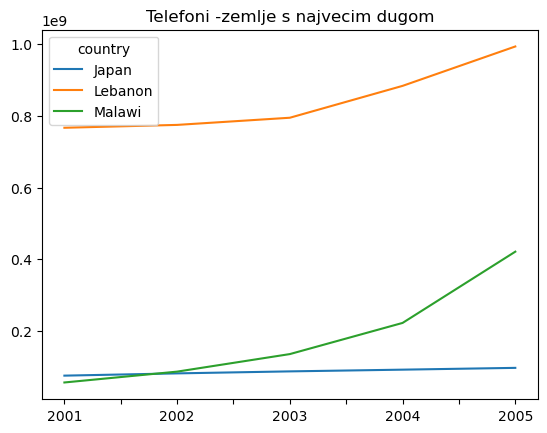

In [490]:

cell_phones_data_5_years_bottom5_1.set_index(cell_phones_data_5_years_bottom5_1["country"], inplace=True)
cell_phones_data_5_years_bottom5_1=cell_phones_data_5_years_bottom5_1.drop(columns="country")
cell_phones_data_5_years_bottom5_1=cell_phones_data_5_years_bottom5_1.transpose()
cell_phones_data_5_years_bottom5_1.plot(title="Telefoni -zemlje s najvecim dugom")


In [491]:
pc_data_5_years_bottom5_1.set_index(pc_data_5_years_bottom5_1["country"], inplace=True)
pc_data_5_years_bottom5_1=pc_data_5_years_bottom5_1.drop(columns="country")
pc_data_5_years_bottom5_1=pc_data_5_years_bottom5_1.transpose()
pc_data_5_years_bottom5_1


country,Japan,Lebanon,Malawi
2001,45600000.0,250000000.0,13000000.0
2002,48700000.0,300000000.0,14000000.0
2003,52000000.0,350000000.0,15800000.0
2004,<NA>,400000000.0,19700000.0
2005,<NA>,409000000.0,25100000.0


<Axes: title={'center': 'PC -zemlje s najvecim dugom'}>

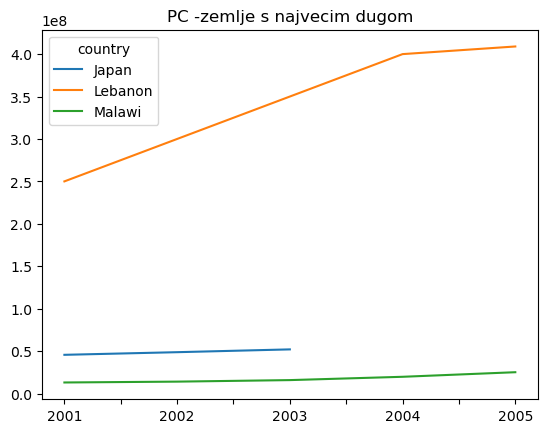

In [492]:
pc_data_5_years_bottom5_1.plot(title="PC -zemlje s najvecim dugom")

<Axes: title={'center': 'Telefoni -zemlje s najmanjim dugom'}>

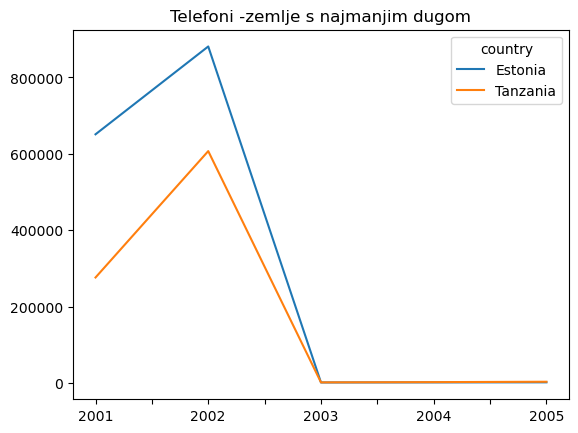

In [493]:
cell_phones_data_5_years_top5_1.set_index(cell_phones_data_5_years_top5_1["country"], inplace=True)
cell_phones_data_5_years_top5_1=cell_phones_data_5_years_top5_1.drop(columns="country")
cell_phones_data_5_years_top5_1=cell_phones_data_5_years_top5_1.transpose()
cell_phones_data_5_years_top5_1.plot(title="Telefoni -zemlje s najmanjim dugom")


<Axes: title={'center': 'PC -zemlje s najmanjim dugom'}>

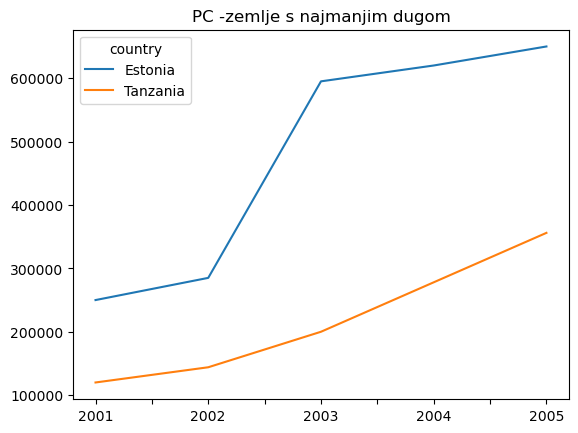

In [494]:
pc_data_5_years_top5_1.set_index(pc_data_5_years_top5_1["country"], inplace=True)
pc_data_5_years_top5_1=pc_data_5_years_top5_1.drop(columns="country")
pc_data_5_years_top5_1=pc_data_5_years_top5_1.transpose()
pc_data_5_years_top5_1.plot(title="PC -zemlje s najmanjim dugom")

Kod zemalja s najmanjim dugom primjetan je pad prodaje PC-a dok  trend rasta prodaje mobilnih uredaja se nastavlja.
Kod zemalja s njavecim dugom, prisutan je rast prodaja i PC-a i mobilnih uredaja. 